Programação Probabilística 
=====
e Métodos Bayesianos para Hackers 
========

##### Versão 0.1

`Conteúdo original criado por Cam Davidson-Pilon`

`Transferido para Python 3 e PyMC3 por Max Margenot (@clean_utensils) e Thomas Wiecki (@twiecki) em Quantopian (@quantopian)`
__


Bem-vindo a *Métodos Bayesianos para Hackers*. O repositório Github completo está disponível em [github/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers). Os outros capítulos podem ser encontrados em [homepage](https://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/). Esperamos que você goste do livro e incentivamos qualquer contribuição!
___

Versão pt_BR

Tradução por Rodolpho Macedo dos Santos disponibilizado em [Probabilistic-Programming-and-Bayesian-Methods-for-Hackers](http://github.com/rodolphomacedo/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

Capítulo 1
======
***

A filosofia da inferência bayesiana
------

> Você é um programador habilidoso, mas ainda assim existem bugs em seu código. Após uma implementação particularmente difícil de um algoritmo, você decide testar seu código em um exemplo trivial. Ele roda. Você testa o código em um problema mais difícil. Isso roda mais uma vez. E roda no próximo, *ainda mais difícil*, roda também! Você está começando a acreditar que pode não ter bugs no código ...

Se você pensa assim, então parabéns, você já está pensando bayesiano! A inferência bayesiana é simplesmente atualizar suas crenças após considerar novas evidências. Um bayesiano raramente pode ter certeza sobre o resultado, mas pode estar muito confiante. Assim como no exemplo acima, nunca podemos ter 100% de certeza de que nosso código está livre de bugs, a menos que o testemos em todos os problemas possíveis; algo raramente possível na prática. Em vez disso, podemos testá-lo em um grande número de problemas e, se for bem-sucedido, podemos nos sentir mais *confiantes* sobre nosso código, mas ainda não temos certeza. A inferência bayesiana funciona de forma idêntica: atualizamos nossas crenças sobre um resultado; raramente podemos ter certeza absoluta, a menos que excluamos todas as outras alternativas.


### O estado de espírito bayesiano

A inferência bayesiana difere da inferência estatística mais tradicional por preservar a *incerteza*. A princípio, isso soa como uma técnica estatística ruim. As estatísticas não são apenas derivar *certeza* da aleatoriedade? Para reconciliar isso, precisamos começar a pensar como bayesianos.

A visão de mundo bayesiana interpreta a probabilidade como uma medida de *credibilidade em um evento*, ou seja, o quão confiantes estamos na ocorrência de um evento. Na verdade, veremos em um momento que esta é a interpretação natural da probabilidade.

Para que isso fique mais claro, consideramos uma interpretação alternativa da probabilidade: *Frequentista* (ou *Frequencista*), conhecida como a versão mais *clássica* da estatística, assume que a probabilidade é a frequência relativa de eventos no longo prazo (daí o título concedido). Por exemplo, a *probabilidade de acidentes de avião* sob uma filosofia frequentista é interpretada como a *frequência relativa no longo prazo de acidentes de avião*. Isso faz sentido lógico para muitas probabilidades de eventos, mas se torna mais difícil de entender quando os eventos não têm a frequência de ocorrência de longo prazo. Considere: muitas vezes atribuímos probabilidades aos resultados das eleições presidenciais, mas a eleição em si só acontece uma vez! Os frequentistas contornam isso invocando realidades alternativas e dizendo que, em todas essas realidades, a freqüência das ocorrências define a probabilidade.

Os bayesianos, por outro lado, têm uma abordagem mais intuitiva. Os bayesianos interpretam uma probabilidade como uma medida de *crença*, ou a confiança, da ocorrência de um evento. Simplesmente, a probabilidade é um resumo de uma opinião. Um indivíduo que atribui uma crença de $0$ a um evento não tem confiança de que o evento ocorrerá; inversamente, atribuir uma crença de $1$ implica que o indivíduo está absolutamente certo da ocorrência de um evento. Crenças entre $0$ e $1$ permitem ponderações para outros resultados. Esta definição está de acordo com a probabilidade do exemplo do acidente de avião, por termos observado a frequência dos acidentes de avião, a crença de um indivíduo deve ser igual a essa frequência, excluindo qualquer informação externa. Da mesma forma, sob esta definição de probabilidade igualmente a crenças, é significativo dizer que a probabilidade (crença) do resultado das eleições presidenciais: o quão confiante você está, o candidato *A* irá vencer?


Observe no parágrafo acima, atribuímos a medida de crença (probabilidade) a um *indivíduo*, não à Natureza. Isso é muito interessante, pois essa definição abre espaço para crenças conflitantes entre os indivíduos. Novamente, isso é apropriado para o que ocorre naturalmente: diferentes indivíduos têm diferentes crenças sobre os eventos que ocorrem, porque possuem diferentes *informações* sobre o mundo. A existência de diferentes crenças não significa que alguém esteja errado. Considere os seguintes exemplos que demonstram a relação entre crenças e probabilidades individuais:

- Lanço uma moeda e ambos adivinhamos o resultado. Ambos concordaríamos, supondo que a moeda seja justa, que a probabilidade de cara é $\frac{1}{2}$. Suponha, então, que eu espie a moeda. Agora eu sei com certeza qual é o resultado: eu atribuo probabilidade $1.0$ a cara ou coroa (seja qual for). Agora, qual é a *sua* crença de que a moeda é cara? Meu conhecimento do resultado não mudou os resultados da moeda. Assim, atribuímos diferentes probabilidades ao resultado.

- Seu código tem um bug ou não, mas não sabemos com certeza qual afirmação é verdadeira, embora tenhamos uma crença sobre a presença ou ausência de um bug.

- Um paciente médico está exibindo os sintomas $x$, $y$ e $z$. E existem várias doenças que poderiam estar causando todos esses sintomas, mas apenas uma doença está presente. Um médico tem crenças sobre qual doença, mas um segundo médico pode ter crenças ligeiramente diferentes.

Essa filosofia da abordagem de crenças como probabilidade é natural para os humanos. Nós a utilizamos constantemente à medida que interagimos com o mundo e vemos apenas verdades parciais, mas reunimos evidências para formar as crenças. Alternativamente, você deve ser *treinado* para pensar como um frequentista.

Para nos alinhar com a notação de probabilidade tradicional, denotamos nossa crença sobre o evento $A$ como $P(A)$. Chamamos essa quantidade de *probabilidade a priori*.

John Maynard Keynes, um grande economista e pensador, disse: "Quando os fatos mudam, eu mudo de ideia. O que você faz, senhor?" Esta citação reflete a maneira como um bayesiano atualiza suas crenças depois de ver as evidências. Mesmo &mdash; especialmente &mdash; se a evidência for contrária ao que se acreditava inicialmente, a evidência não pode ser ignorada. Denotamos nossa crença atualizada como $P(A | X)$, interpretada como a probabilidade de $A$ dada a evidência $X$. Chamamos de atualização da crença  da *probabilidade posteriori* para contrastá-la com a probabilidade a priori. Por exemplo, considere as probabilidades a posteriori (leia-se: crenças a posteriori) dos exemplos acima, após observar algumas evidências $X$:

1\. $P(A): \;\;$ a moeda tem 50 por cento de chance de ser cara. $P(A | X):\;\;$ Voce olha para a moeda, 
observa que caiu Cara, denote essa informação $X$ e atribua trivialmente a probabilidade $1.0$ para Cara e $0.0$ para Coroa.

2\.   $P(A): \;\;$ Este é um código grande e complexo, provavelmente contém um bug. $P(A | X): \;\;$ O código passou em todos os testes $X$; ainda pode haver um bug, mas sua presença é menos provável agora.

3\.  $P(A):\;\;$ O paciente pode ter muitas doenças. $P(A | X):\;\;$  Realização de um teste de sangue gerou evidências $X$, descartando algumas das possíveis doenças de consideração.

É claro que em cada exemplo não descartamos completamente a crença a priori depois de ver a nova evidência $X$, mas *reponderamos a priori* para incorporar a nova evidência (ou seja, colocamos mais peso ou confiança em algumas crenças versus outras).

Ao introduzir a incerteza a priori sobre os eventos, já estamos admitindo que qualquer suposição que fizermos é potencialmente muito errada. Depois de observar dados, evidências ou outras informações, atualizamos nossas crenças e nosso palpite de tal modo a se tornar *menos errada*. Este é o lado alternativo da previsão de uma moeda, onde normalmente tentamos estar *mais certos*.


### Inferência Bayesiana na Prática

Se a inferência frequentista e bayesiana fossem funções de programação, com as entradas sendo problemas estatísticos, então as duas seriam diferentes no que retornam ao usuário. A função de inferência frequentista retornaria um número, representando uma estimativa (normalmente uma estatística de resumo como a média da amostra etc.), enquanto a função Bayesiana retornaria as *probabilidades*.


Por exemplo, em nosso problema de debugging acima, chamamos a função frequentista com o argumento "Meu código passou em todos os testes $X$; meu código está livre de erros?" retornaria um *SIM*. Por outro lado, perguntando à nossa função Bayesiana "Muitas vezes meu código tem bugs. Meu código passou em todos os testes $X$; meu código está livre de bugs?" retornaria algo muito diferente: probabilidades de *SIM* e de *NÃO*. A função poderia retornar:

>    *SIM*, com probabilidade de 0,8; *NÃO*, com probabilidade de 0,2

Isso é muito diferente da resposta que a função frequentista retornou. Observe que a função Bayesiana aceita um argumento adicional: *"Freqüentemente meu código tem bugs" *. Este parâmetro é o *a priori*. Ao incluir o parâmetro a priori, estamos dizendo à função bayesiana para incluir nossa crença sobre a situação. Tecnicamente, este parâmetro na função bayesiana é opcional, mas veremos que excluí-lo terá suas consequências.

#### Incorporando evidências

À medida que adquirimos mais e mais exemplos de evidências, nossa crença a priori é *apagada* pelas novas evidências. Isto é o esperado. Por exemplo, se sua crença a priori é algo ridículo, como "Espero que o sol exploda hoje", e a cada dia que você estiver errado, você esperaria que qualquer inferência a corrigisse, ou pelo menos alinhasse melhor suas crenças. A inferência bayesiana corrigirá essa crença.

Denote $N$ como o número de evidências que possuímos. À medida que reunimos uma quantidade *infinita* de evidência, digamos como $N \rightarrow \infty$, nossos resultados bayesianos (frequentemente) se alinham aos resultados frequentistas. Portanto, para $N$ grandes, a inferência estatística é mais ou menos objetiva. Por outro lado, para $N$ pequenos, a inferência é muito mais *instável*: as estimativas frequentistas têm mais variância e intervalos de confiança maiores. É aqui que a análise bayesiana se destaca. Ao introduzir uma probabilidade a priori e retornar (em vez de uma estimativa escalar), *preservamos a incerteza* que reflete a instabilidade da inferência estatística de um pequeno conjunto de dados $N$.

Pode-se pensar que para $N$ grandes, pode-se ficar indiferente entre as duas técnicas, visto que elas oferecem inferência semelhante, e pode-se inclinar para os métodos frequentistas mais simples computacionalmente. Um indivíduo nesta posição deve considerar a seguinte citação de Andrew Gelman (2005)[1], antes de tomar tal decisão:

> Os tamanhos das amostras nunca são grandes. Se $N$ for muito pequeno para obter uma estimativa suficientemente precisa, você precisará obter mais dados (ou fazer mais suposições). Mas uma vez que $N$ é "grande o suficiente", você pode começar a subdividir os dados para aprender mais (por exemplo, em uma pesquisa de opinião pública, depois de ter uma boa estimativa para todo o país, você pode estimar entre homens e mulheres, pessoas do norte e pessoas do sul, diferentes faixas etárias, etc.). $N$ nunca será suficiente porque se fosse "suficiente" você já estaria próximo do problema para o qual precisa de mais dados.

### Os métodos frequentistas estão incorretos então?

**Não.**

Os métodos freqüentistas ainda são úteis ou de última geração em muitas áreas. Ferramentas como regressão linear de mínimos quadrados, regressão LASSO e algoritmos de maximização de expectativa são poderosos e rápidos. Os métodos bayesianos complementam essas técnicas resolvendo problemas que essas abordagens não conseguem ou iluminando o sistema subjacente com uma modelagem mais flexível.


#### Uma nota sobre *Big Data*
Paradoxalmente, os problemas analíticos preditivos de big data são resolvidos por algoritmos relativamente simples [2][4]. Assim, podemos argumentar que a dificuldade de previsão de big data não está no algoritmo usado, mas sim nas dificuldades computacionais de armazenamento e execução em grande conjuntos de dados. (Também se deve considerar a citação de Gelman acima e perguntar "Eu realmente tenho cenário de big data?")

Os problemas analíticos muito mais difíceis envolvem *dados médios* e, especialmente problemáticos, *dados realmente pequenos*. Usando um argumento semelhante ao do Gelman citado acima, se os problemas de big data forem *grandes o suficiente* para serem prontamente resolvidos, então, deveriamos estar muito mais interessados nos conjuntos de dados *não muito grandes*.

### Nossa Estrutura Bayesiana

Estamos interessados em crenças, que podem ser interpretadas como probabilidades pelo pensamento bayesiano. Temos uma crença *a priori* do evento $A$, essas crenças foram formadas por informações anteriores, por exemplo, nossa crença a priori sobre os bugs encontrados em nosso código antes de realizar os testes.

Em segundo lugar, observamos nossas evidências. Para continuar em nosso exemplo do código com bugs: se nosso código passar nos testes $X$, então queremos atualizar nossa crença com essa nova informação. Chamamos essa nova crença de probabilidade *a posteriori*. A atualização de nossa crença é feita por meio da seguinte equação, conhecida como Teorema de Bayes, em homenagem a seu descobridor Thomas Bayes:

\begin{align}
 P( A | X )\;\ =\;\ & \frac{ P(X | A) P(A) } {P(X) } \\\\[5pt]
& \propto P(X | A) P(A)\;\; (\propto \text{é proporcional à })
\end{align}

A fórmula acima não é exclusiva da inferência bayesiana: é um fato matemático com usos fora da inferência bayesiana. A inferência bayesiana apenas a utiliza para conectar as probabilidades a priori $P(A)$ com as probabilidades a posteriori atualizadas $P(A | X)$.

##### Exemplo:  obrigatório exemplo de cara ou coroa

Todo texto de estatísticas deve conter um exemplo de cara ou coroa, vou usá-lo aqui para tirá-lo do caminho. Suponha que, ingenuamente, você não tem certeza sobre a probabilidade de cara em um cara ou coroa (alerta de spoiler: é 50%). Você acredita que existe algum índice subjacente verdadeiro, chame-o de $p$, mas não tem opinião prévia sobre o que $p$ pode ser.

Começamos a jogar uma moeda e registramos as observações: $H$ ou $T$. Estes são os nossos dados observados. Uma pergunta interessante a se fazer é como nossa inferência muda à medida que observamos mais e mais dados? Mais especificamente, como são nossas probabilidades a posteriori quando temos poucos dados, em comparação com quando temos muitos dados.

Abaixo, traçamos uma seqüência de atualização das probabilidades a posteriori à medida que observamos quantidades crescentes de dados (cara ou coroa).

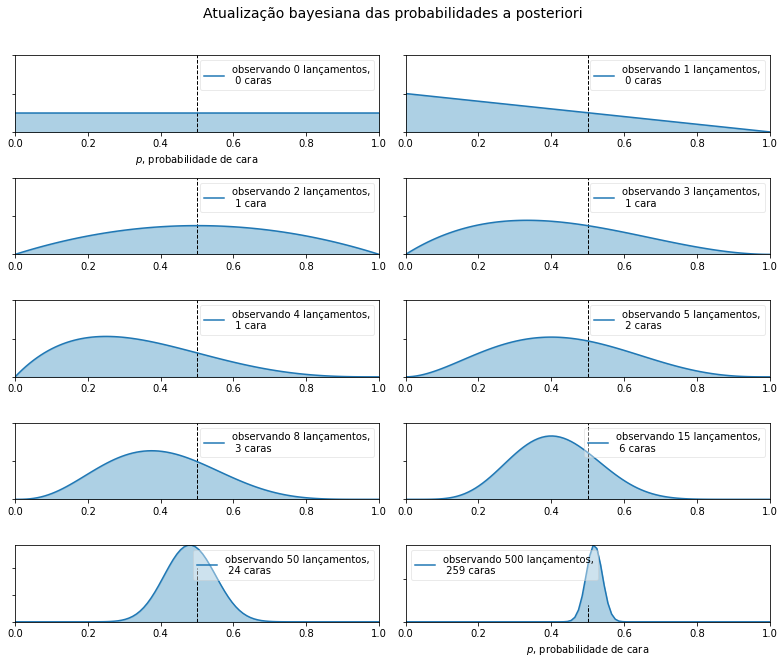

In [2]:
"""
O livro usa um arquivo matplotlibrc personalizado, que fornece estilos exclusivos para
gráficos de matplotlib. Se estiver executando este livro, e você deseja usar o 
estilo do livro, são fornecidas duas opções:
     1. Substitua seu próprio arquivo matplotlibrc com o arquivo rc fornecido no
        styles/dir do livro. Veja http://matplotlib.org/users/customizing.html
     2. Também nos estilos está o arquivo bmh_matplotlibrc.json. Isso pode ser usado para
        atualizar os estilos apenas neste bloco de notas. Tente executar o seguinte código:

        import json
        s = json.load(open("../styles/bmh_matplotlibrc.json"))
        matplotlib.rcParams.update(s)

"""
# O código abaixo pode ser ignorado, pois atualmente não é importante, mais ele
# usa tópicos avançados que ainda não cobrimos. OLHE A FOTO, MICHAEL!

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# Para os já preparados, estou usando o conjugação a priori da Binomial.
for k, N in enumerate(n_trials):
    sx = plt.subplot(int(len(n_trials)/2), 2, k+1)
    plt.xlabel("$p$, probabilidade de cara") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    if heads != 1:
        plt.plot(x, y, label="observando %d lançamentos,\n %d caras" % (N, heads))
    else:
        plt.plot(x, y, label="observando %d lançamentos,\n %d cara" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Atualização bayesiana das probabilidades a posteriori",
             y=1.02,
             fontsize=14)

plt.tight_layout()

As probabilidades a posteriori são representadas pelas curvas, e nossa incerteza é proporcional à largura da curva. Como mostra o gráfico acima, conforme começamos a observar os dados, nossas probabilidades a posteriori começam a se deslocar e se mover. Eventualmente, conforme observamos mais e mais dados (caras ou coroas), nossas probabilidades ficarão cada vez mais estreitas em torno do valor real de $p = 0.5$ (marcado por uma linha tracejada).


Observe que os gráficos nem sempre têm *picos* em 0,5. Não há motivo para isso: lembre-se de que presumimos que não tínhamos uma opinião a priori sobre qual é o valor de $p$. Na verdade, se observarmos dados bastante extremos, digamos 8 lançamentos e apenas 1 cara observada, nossa distribuição pareceria muito tendenciosa *longe* de agrupar em torno de $0.5$ (sem a opinião a priori, quão confiante você se sentiria ao apostar em uma moeda justa após observar 8 coroas e 1 cara?). À medida que mais dados se acumulam, veríamos mais e mais a probabilidade sendo atribuída a $p = 0.5$, embora nunca temos toda ela.

O próximo exemplo é uma demonstração simples da matemática da inferência bayesiana.

##### Exemplo: Bug, ou apenas um recurso agradável e não intencional?


Seja $A$ o evento em que nosso código **não contém  bugs**. Seja $X$ o evento em que o código passa em todos os testes de depuração. Por enquanto, deixaremos a probabilidade a priori de nenhum bug como variável, ou seja, $P(A) = p$.

Estamos interessados em $P(A|X)$, ou seja, a probabilidade de nenhum bug, dados nossos testes de debugging $X$. Para usar a fórmula acima, precisamos calcular algumas quantidades.

O que é $P(X|A)$, ou seja, a probabilidade de que o código passe nos testes $X$ *dado* que não haja bugs? Bem, é igual a 1, pois um código sem bugs passará em todos os testes.

$P(X)$ é um pouco mais complicado: o evento $X$ pode ser dividido em duas possibilidades, o evento $X$ ocorrendo mesmo que nosso código *realmente tenha* bugs (denotado $\sim A\;$, dito *não $A$*), ou evento $X$ sem bugs ($A$).

Assim, $P(X)$ pode ser representado como:

\begin{align}
P(X ) & = P(X \text{ e } A) + P(X \text{ e } \sim A) \\\\[5pt]
 & = P(X|A)P(A) + P(X | \sim A)P(\sim A)\\\\[5pt]
& = P(X|A)p + P(X | \sim A)(1-p)
\end{align}

Já calculamos $P(X|A)$ acima ( $=1$). Por outro lado, $ P(X|\sim A)$ é subjetivo: nosso código pode passar nos testes, mas ainda tem um bug nele, embora a probabilidade de haver um bug seja reduzida. Observe que isso depende do número de testes realizados, do grau de complicação nos testes, etc. Vamos ser conservadores e atribuir $P(X|\sim A) = 0,5$. Então:

\begin{align}
P(A | X) & = \frac{1\cdot p}{ 1\cdot p +0.5 (1-p) } \\\\
& = \frac{p}{ p + 0.5-0.5  p } \\\\
& = \frac{p}{ 0.5 + 0.5 p } \\\\
& = \frac{p}{ 0.5 \cdot ( 1 + p )} \\\\
& = \frac{ 2 p}{1+p}
\end{align}

Esta é a probabilidade a posteriori. A qual se parece como a nossa função a priori, $p \in [0,1]$?

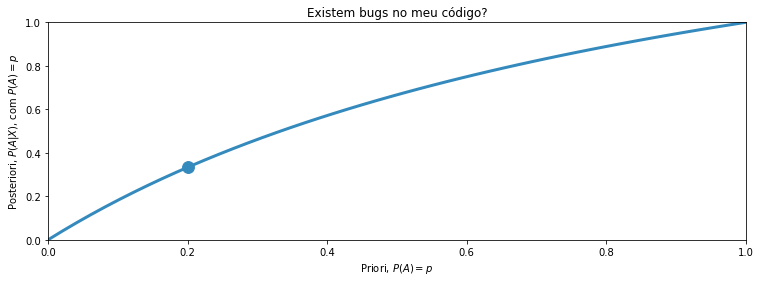

In [3]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2*p/(1+p), color="#348ABD", lw=3)
#plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2*(0.2)/1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Priori, $P(A) = p$")
plt.ylabel("Posteriori, $P(A|X)$, com $P(A) = p$")
plt.title("Existem bugs no meu código?");

Podemos ver os maiores ganhos se observarmos os testes $X$ que passaram quando a probabilidade a priori, $p$, é baixa. Vamos definir um valor específico para a priori. Sou um programador bom (eu acho), então vou me dar uma ideia realista a priori de 0.20, ou seja, há 20% de chance de escrever um código sem bugs. Para ser mais realista, essa prioridade deve ser uma função de quão complicado e grande é o código, mas vamos fixá-lo em 0.20. Então, minha crença atualizada de que meu código está livre de bugs é de 0,33.

Lembre-se de que a priori é uma probabilidade: $p$ é a probabilidade a priori de *não haver bugs*, então $1-p$ é a probabilidade a priori de *ter bugs* no código.

Da mesma forma, nossa posteriori também é uma probabilidade, com $P(A|X)$ a probabilidade de não haver bug *dado que vimos que todos os testes passaram*, portanto $1 - P(A|X)$ é a probabilidade de haver um bug *considerando que todos os testes passaram*. Qual é a nossa probabilidade a posteriori? Abaixo está um gráfico das probabilidades a priori e a posteriori.

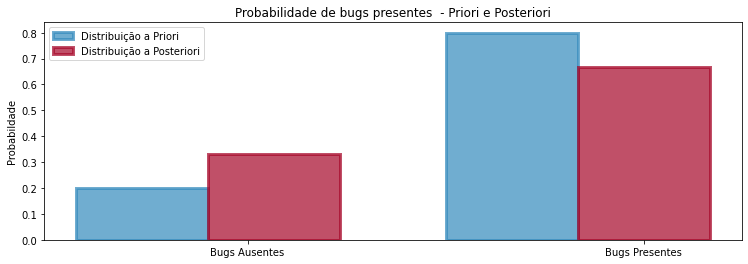

In [4]:
figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

prior = [0.20, 0.80]
posterior = [1./3, 2./3]
# posterior = [(2*0.2)/(1+0.2),1-(2*0.2)/(1+0.2)] 

plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="Distribuição a Priori",
        lw="3", edgecolor=colours[0])

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label="Distribuição a Posteriori",
        lw="3", edgecolor=colours[1])

plt.xticks([0.20, .95], ["Bugs Ausentes", "Bugs Presentes"])
plt.title("Probabilidade de bugs presentes  - Priori e Posteriori")
plt.ylabel("Probabildade")
plt.legend(loc="upper left");

Observe que, depois que observamos a ocorrência de $X$, a probabilidade dos bugs estarem ausentes aumentou. Aumentando o número de testes, podemos nos aproximar da confiança (probabilidade 1) de que não há bugs presentes.

Este foi um exemplo muito simples de inferência bayesiana e da regra de Bayes. Infelizmente, a matemática necessária para realizar inferências bayesianas mais complicadas apenas se torna mais difícil, exceto para casos construídos artificialmente. Veremos mais tarde que esse tipo de análise matemática é realmente desnecessária. Primeiro, devemos ampliar nossas ferramentas de modelagem. A próxima seção trata das *distribuições de probabilidades*. Se você já estiver familiarizado, sinta-se à vontade para pular (ou pelo menos dar uma olhada), mas para os menos familiarizados, a próxima seção é essencial.

_______

##Distribuições de Probabilidades


**Vamos lembrar rapidamente o que é uma distribuição de probabilidade:** Seja $Z$ alguma variável aleatória. Então, associada a $Z$ está uma *função de distribuição de probabilidade* que atribui probabilidades aos diferentes resultados que $Z$ pode obter. Graficamente, uma distribuição de probabilidade é uma curva em que a probabilidade de um resultado é proporcional à altura da curva. Você pode ver exemplos na primeira figura deste capítulo.

Podemos dividir as variáveis aleatórias em três classificações:

- **$Z$ é discreto**: Variáveis aleatórias discretas só podem assumir valores em uma lista especificada. Coisas como populações, classificações de filmes e número de votos são variáveis aleatórias discretas. Variáveis aleatórias discretas tornam-se mais claras quando as contrastamos com ...

- **$Z$ é contínuo**: a variável aleatória contínua pode assumir valores exatos arbitrariamente. Por exemplo, temperatura, velocidade, tempo, cor são modelados como variáveis contínuas porque você pode tornar os valores cada vez mais precisos.

- **$Z$ é misto**: as variáveis aleatórias mistas atribuem probabilidades a variáveis aleatórias discretas e contínuas, ou seja, é uma combinação das duas categorias acima.


### Caso Discreto

Se $Z$ for discreto, então sua distribuição é chamada de *função de massa de probabilidade*, que mede a probabilidade de $Z$ assumir o valor $k$, denotado $P(Z = k)$. Observe que a função de massa de probabilidade descreve completamente a variável aleatória $Z$, ou seja, se conhecemos a função de massa, sabemos como $Z$ deve se comportar. Existem funções de massa de probabilidade populares que aparecem de forma consistente: iremos apresentá-las conforme necessário, mas vamos introduzir a primeira função de massa de probabilidade muito útil. 

Dizemos que a variável $Z$ é *Poisson*-distribuída se:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$\lambda$ é chamado de parâmetro da distribuição e controla a forma da distribuição. Para a distribuição de Poisson, $\lambda$ pode ser qualquer número positivo. Aumentando $\lambda$, estamos adicionamos mais probabilidade a valores maiores e, inversamente, diminuindo $\lambda$, estamos adicionamos mais probabilidade a valores menores. Pode-se descrever $\lambda$ como a *intensidade* da distribuição de Poisson.

Ao contrário de $\lambda$, que pode ser qualquer número positivo, o valor $k$ na fórmula acima deve ser um número inteiro não negativo, ou seja, $k$ deve assumir os valores 0,1,2 e assim por diante. Isso é muito importante, porque se você quisesse modelar uma população, não conseguiria entender as populações com 4,25 ou 5,612 indivíduos.

Se a variável aleatória $z$ tem a distribuição de massa de uma Poisson, nós denotamos isso escrevendo: 

$$Z \sim \text{Poi}(\lambda) $$

Uma propriedade útil da distribuição de Poisson é que seu valor esperado é igual ao seu parâmetro, ou seja:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

Usaremos essa propriedade com frequência, por isso é útil lembrar. Abaixo, traçamos a distribuição de massa de probabilidade para diferentes valores de $\lambda$. A primeira coisa a notar é que ao aumentar $\lambda$, adicionamos mais probabilidade de ocorrência de valores maiores. Em segundo lugar, observe que embora o gráfico termine em 15, as distribuições não. Eles atribuem probabilidade positiva a cada número inteiro não negativo.

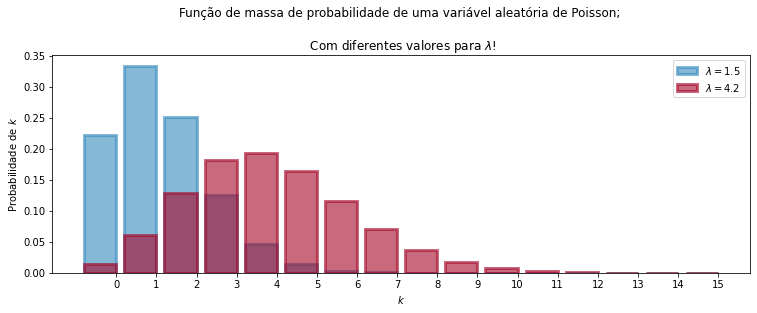

In [9]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("Probabilidade de $k$")
plt.xlabel("$k$")
plt.title("""Função de massa de probabilidade de uma variável aleatória de Poisson; 
\n Com diferentes valores para $\lambda$!""");

### Caso Contínuo

Em vez de uma função de massa de probabilidade, agora temos uma variável aleatória contínua que tem uma *função de densidade de probabilidade*. Isso pode parecer uma nomenclatura desnecessária, mas a função de densidade e a função de massa são criaturas muito diferentes. Um exemplo de variável aleatória contínua é uma variável aleatória com *densidade exponencial*. A função de densidade para uma variável aleatória exponencial se parece com isto:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

Como uma variável aleatória de Poisson, uma variável aleatória Exponencial pode assumir apenas valores não negativos. Mas, ao contrário de uma variável de Poisson, a Exponencial pode assumir *quaisquer* valores não negativos, incluindo valores não integrais, como 4,25 ou 5,612401. Esta propriedade a torna uma escolha ruim para dados de contagem, que devem ser um número inteiro, mas uma ótima escolha para dados de tempo, dados de temperatura (medidos em Kelvins, é claro) ou qualquer outra variável precisa *e positiva*. O gráfico abaixo mostra duas funções de densidade de probabilidade com diferentes valores $\lambda$.

Quando uma variável aleatória $Z$ tem uma distribuição Exponencial com o parâmetro $\lambda$, dizemos *$Z$ é (distribuído conforme) Exponencial* e escrevemos:

$$Z \sim \text{Exp}(\lambda)$$

Dado um $\lambda$ específico, o valor esperado de uma variável aleatória exponencial é igual ao inverso de $\lambda$, ou seja:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

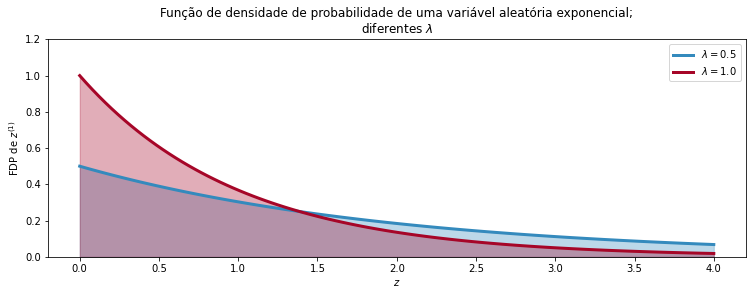

In [11]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("FDP de $z^{(1)}$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("""Função de densidade de probabilidade de uma variável aleatória exponencial;
diferentes $\lambda$""");

----
$^{(1)}$ *Nota do Tradutor*:
A nomenclatura **FDP** é o acrônimo de **F**unção **D**ensidade de **P**robabilidade. Textos em inglês são rotulados como **PDF**, ou seja, **P**robability **D**ensity **F**unction.


### Mas o que é $\lambda \;$?

**Esta questão é o que motiva as estatísticas**. No mundo real, $\lambda$ está oculto para nós. Vemos apenas $Z$ e devemos retroceder para tentar determinar $\lambda$. O problema é difícil porque não há mapeamento um-para-um de $Z$ para $\lambda$. Muitos métodos diferentes foram criados para resolver o problema de estimar $\lambda$, mas como $\lambda$ nunca é realmente observado, ninguém pode dizer com certeza qual método é o melhor!

A inferência bayesiana está preocupada com *crenças* sobre o que $\lambda$ pode ser. Em vez de tentar adivinhar $\lambda$ exatamente, só podemos falar sobre o que $\lambda$ **provavelmente será** atribuindo, assim, uma distribuição de probabilidade à $\lambda$.

Isso pode parecer estranho à primeira vista. Afinal, $\lambda$ é fixo; não é (necessariamente) aleatório! Como podemos atribuir probabilidades a valores de uma variável não aleatória? Ah, caímos na nossa velha maneira de pensar: frequentista. Lembre-se de que, sob a filosofia bayesiana, nós *podemos* atribuir probabilidades se as interpretarmos como crenças. E é totalmente aceitável ter *crenças* sobre o parâmetro $\lambda$.


##### Exemplo: inferir comportamento dos dados nas mensagens de texto recebidas

Vamos tentar modelar um exemplo mais interessante, que diz respeito à taxa na qual um usuário envia e recebe mensagens de texto:

> Você recebe uma série de mensagens de texto diárias *(whatsapp, messenger, email, etc)* de  de um usuário do seu sistema. Os dados, plotados ao longo do tempo, aparecem no gráfico abaixo. Você está curioso para saber se os hábitos de envio de mensagens de texto do usuário mudaram com o tempo, gradual ou repentinamente. Como você pode modelar isso? (Estes são, na verdade, meus próprios dados de mensagens de texto. Avalie minha popularidade como desejar.)

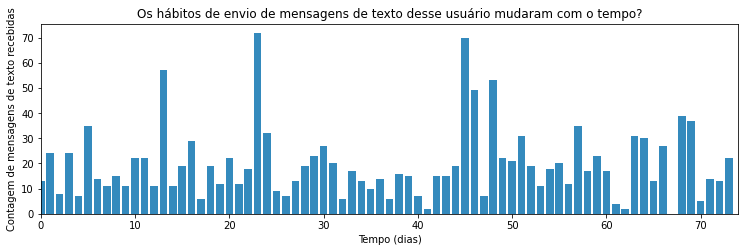

In [22]:
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Tempo (dias)")
plt.ylabel("Contagem de mensagens de texto recebidas")
plt.title("Os hábitos de envio de mensagens de texto desse usuário mudaram com o tempo?")
plt.xlim(0, n_count_data);

Antes de começarmos a modelar, veja o que você pode descobrir olhando para o gráfico acima. Você diria que houve uma mudança de comportamento durante esse período?

Como podemos começar a modelar isso? Bem, como já vimos convenientemente, uma variável aleatória de Poisson é um modelo muito apropriado para este tipo de dados de *contagem*. Denotando a **$C$**ontagem de mensagens de texto do dia $i$ por $C_i$,

$$ C_i \sim \text{Poisson}(\lambda)  $$

Não temos certeza de qual é realmente o valor do parâmetro $\lambda$. Olhando para o gráfico acima, parece que a taxa pode ficar mais alta no final do período de observação, o que equivale a dizer que $\lambda$ aumenta em algum ponto durante as observações. (Lembre-se de que um valor mais alto de $\lambda$ atribui mais probabilidade a resultados maiores. Ou seja, há uma probabilidade maior de muitas mensagens de texto terem sido enviadas em um determinado dia.)

Como podemos representar esta observação matematicamente? Vamos supor que em algum *dia* durante o período de observação (chamaremos esse dia de $\tau$), o parâmetro $\lambda$ repentinamente salte para um valor mais alto. Portanto, temos realmente dois parâmetros $\lambda$: um ($\lambda_1$) para o período anterior a $\tau$ e outro ($\lambda_2$) para o resto do período de observação. Na literatura, uma transição repentina como esta seria chamada de *switchpoint* $^{(1)}$:

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$

Se, na realidade, nenhuma mudança repentina ocorreu e de fato $\lambda_1 = \lambda_2$, então as distribuições posterioris de $\lambda$s devem parecer iguais.

Estamos interessados em inferir os desconhecidos $\lambda$s. Para usar a inferência Bayesiana, precisamos atribuir probabilidades prioris aos diferentes valores possíveis de $\lambda$. Quais seriam boas distribuições de probabilidade a priori para $\lambda_1$ e $\lambda_2$? Lembre-se de que $\lambda$ pode ser qualquer número positivo. Como vimos anteriormente, a distribuição *exponencial* fornece uma função de densidade contínua para números positivos, portanto, pode ser uma boa escolha para modelar $\lambda_i$. Mas lembre-se de que a distribuição exponencial tem um parâmetro próprio, portanto, precisaremos incluir esse parâmetro em nosso modelo. Vamos chamar esse parâmetro de $\alpha$.

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}

$\alpha$ é chamado de *hiperparâmetro* ou *variável pai*. Em termos literais, é um parâmetro que influencia outros parâmetros. Nossa estimativa inicial em $\alpha$ não influencia o modelo muito fortemente, portanto, temos alguma flexibilidade em nossa escolha. Uma boa regra prática é definir o parâmetro exponencial igual ao inverso da média dos dados de contagem. Como estamos modelando $\lambda$ usando uma distribuição exponencial, podemos usar a identidade de valor esperada mostrada anteriormente para obter:

$$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 

Uma alternativa, e algo que encorajo o leitor a tentar, seria ter duas prioris: um para cada $\lambda_i$. A criação de duas distribuições exponenciais com valores $\alpha$ diferentes reflete nossa crença à priori de que a taxa mudou em algum ponto durante as observações.

E quanto a $\tau$? Por causa do ruído dos dados, é difícil definir a priori quando $\tau$ pode ter ocorrido. Em vez disso, podemos atribuir uma *crença à priori uniforme* a todos os dias possíveis. Isso é equivalente a dizer:

\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}

Depois de tudo isso, como nossas distribuições à priori em geral ficam para as variáveis desconhecidas? Francamente, *não importa*. O que devemos entender é que é uma bagunça feia e complicada envolvendo símbolos que apenas um matemático poderia amar. E as coisas só vão ficar mais feias quanto mais complicados nossos modelos se tornarem. Independentemente disso, tudo o que realmente importa é a distribuição *à posteriori*.

Em seguida, voltamos para PyMC3, uma biblioteca Python para realizar análises bayesianas que não se intimida com o monstro matemático que criamos.


Apresentando nosso primeiro martelo: PyMC3
-----

PyMC3 é uma biblioteca Python para programação de análises Bayesianas[3]. É uma biblioteca rápida e bem mantida. A única parte lamentável é que sua documentação está faltando em certas áreas, especialmente aquelas que preenchem a lacuna entre iniciante e o hacker. Um dos principais objetivos deste livro é resolver esse problema e também demonstrar por que o PyMC3 é tão legal.

Vamos modelar o problema acima usando PyMC3. Esse tipo de programação é chamado de *programação probabilística*, um nome impróprio infeliz que invoca idéias de código gerado aleatoriamente e provavelmente confundiu e assustou os usuários para longe desse campo. O código não é aleatório; é probabilístico no sentido de que criamos modelos de probabilidade usando variáveis de programação como componentes do modelo. Os componentes do modelo são primitivos de primeira classe na estrutura PyMC3.

B. Cronin [5] tem uma descrição muito motivadora de programação probabilística:

> Outra maneira de pensar sobre isso: ao contrário de um programa tradicional, que só roda nas direções para frente, um programa probabilístico é executado tanto na direção para frente quanto para trás. Ele avança para calcular as consequências das suposições que contém sobre o mundo (ou seja, o espaço do modelo que representa), mas também avança para trás a partir dos dados para restringir as possíveis explicações. Na prática, muitos sistemas de programação probabilística habilmente intercalam essas operações de avanço e retrocesso para localizar com eficiência as melhores explicações.

Por causa da confusão gerada pelo termo *programação probabilística*, vou abster-me de usá-lo. Em vez disso, direi simplesmente *programação*, pois é isso que realmente é.

O código PyMC3 é fácil de ler. A única coisa nova deve ser a sintaxe. Simplesmente lembre-se de que estamos representando os componentes do modelo ($\tau, \lambda_1, \lambda_2 $) como variáveis.

---

$^{(1)}$(*Nota do Tradutor*): *switchpoint* significa ponto de troca, nesse exemplo, indica o momento no qual o comportamento da quantidade de mensagens recebidas se alterou.

In [23]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Lembre-se que count_data é a 
                                   # variável que mantém nossas contagens de txt 
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    

    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


No código acima, criamos as variáveis PyMC3 correspondentes a $\lambda_1$ e $\lambda_2$. Nós os atribuímos às *variáveis estocásticas* de PyMC3, e são chamadas assim porque são tratadas pelo backend como geradores de números aleatórios.

In [24]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

Este código cria uma nova função `lambda_`, mas realmente podemos pensar nela como uma variável aleatória: a variável aleatória $\lambda$ de cima. A função `switch ()` atribui `lambda_1` ou` lambda_2` como o valor de `lambda_`, dependendo do lado de` tau` em que estamos. Os valores de `lambda_` até` tau` são `lambda_1` e os valores posteriores são` lambda_2`.

Observe que, como `lambda_1`,` lambda_2` e `tau` são aleatórios,` lambda_` será aleatório. **Não** estamos corrigindo nenhuma variável ainda.

In [25]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

A variável `observation` combina nossos dados,` count_data`, com nosso esquema de geração de dados proposto, dado pela variável `lambda_`, através da palavra-chave `observation`.

O código abaixo será explicado no Capítulo 3, mas eu o mostro aqui para que você possa ver de onde vêm nossos resultados. Pode-se pensar nisso como um passo de *aprendizagem*. O maquinário sendo empregado é chamado *Markov Chain Monte Carlo* (MCMC), que também retardo a explicação até o Capítulo 3. Essa técnica retorna milhares de variáveis aleatórias das distribuições posteriores de $\lambda_1, \lambda_2$ e $\tau$. Podemos traçar um histograma das variáveis aleatórias para ver como as distribuições à posterioris se parecem. Abaixo, coletamos algumas amostras (chamadas *traces*$^{(1)}$ na literatura MCMC) em histogramas.


----
$^{(1)}$ Nota do Tradutor: *traces* podem ser entendidos como o traço, ou melhor, rastros. Significando o caminhos que o algoritmo do MCMC faz no espaço das variáveis no processo de construção da posteriori.

In [26]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:07<00:00, 7817.55draws/s] 
The number of effective samples is smaller than 25% for some parameters.


In [27]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

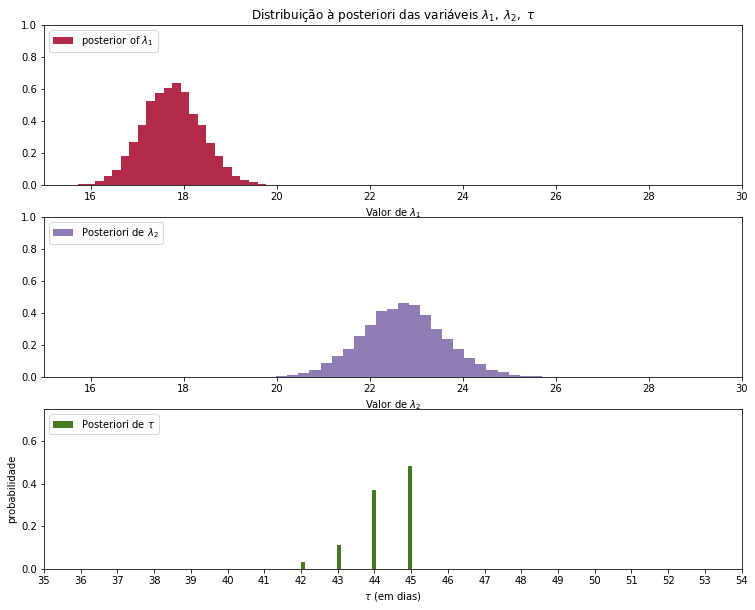

In [31]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Distribuição à posteriori das variáveis $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("Valor de $\lambda_1$")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="Posteriori de $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("Valor de $\lambda_2$")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"Posteriori de $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (em dias)")
plt.ylabel("probabilidade");

### Interpretação

Lembre-se de que na metodologia bayesiana é retornado uma *distribuição*. Portanto, agora temos distribuições para descrever os desconhecidos $\lambda$s e $\tau$. O que ganhamos? Imediatamente, podemos ver a incerteza em nossas estimativas: quanto mais ampla a distribuição, menos certa deve ser nossa crença posterior. Também podemos ver quais são os valores plausíveis para os parâmetros: $\lambda_1$ é cerca de 18 e $\lambda_2$ é cerca de 23. As distribuições posteriores dos dois $\lambda$s são claramente distintas, indicando que é de fato provável que houve uma mudança no comportamento da mensagem de texto do usuário.

Que outras observações você pode fazer? Se você olhar os dados originais novamente, esses resultados parecem razoáveis?

Observe também que as distribuições à posterioris para os $\lambda$s não se parecem com distribuições exponenciais, embora nossas prioris para essas variáveis fossem exponenciais. Na verdade, as distribuições à posterioris não são realmente de qualquer forma que reconhecemos do modelo original. Mas tudo bem! Este é um dos benefícios de se adotar um ponto de vista computacional. Se, em vez disso, tivéssemos feito essa análise usando abordagens matemáticas, teríamos ficado presos a uma distribuição analiticamente intratável (e confusa). No uso de uma abordagem computacional torna-se indiferentes à tratabilidade matemática.

Nossa análise também retornou uma distribuição de $\tau$. Sua distribuição à posteriori parece um pouco diferente das outras duas porque é uma variável aleatória discreta, então não atribui probabilidades a intervalos. Podemos ver que próximo ao dia 45, havia 50% de chance de que o comportamento do usuário mudasse. Se nenhuma mudança tivesse ocorrido, ou se a mudança tivesse sido gradual ao longo do tempo, a distribuição posterior de $\tau$ teria sido mais espalhada, refletindo que muitos dias eram candidatos plausíveis para $\tau$. Em contraste, nos resultados reais, vemos que apenas três ou quatro dias fazem algum sentido como pontos de transição potenciais.

### Enfim, por que eu iria querer amostras da parte da posteriori?

Trataremos dessa questão no restante do livro, e é um eufemismo dizer que nos levará a alguns resultados surpreendentes. Por enquanto, vamos encerrar este capítulo com mais um exemplo.

Usaremos as amostras à posterioris para responder à seguinte pergunta: qual é o número esperado de textos no dia $t,\; 0 \leq t \leq 70$? Lembre-se de que o valor esperado de uma variável Poisson é igual ao seu parâmetro $\lambda$. Portanto, a questão é equivalente a *qual é o valor esperado de $\lambda$ no tempo $t$*?

No código abaixo, o $i$ indexa as amostras das distribuições à posteriori. Dado um dia $t$, fazemos a média de todos os $\lambda_i$ possíveis para esse dia $t$, usando $\lambda_i = \lambda_{1, i}$ se $t \lt \tau_i$ (ou seja, se o a mudança de comportamento ainda não ocorreu), senão usamos $\lambda_i = \lambda_{2, i}$.

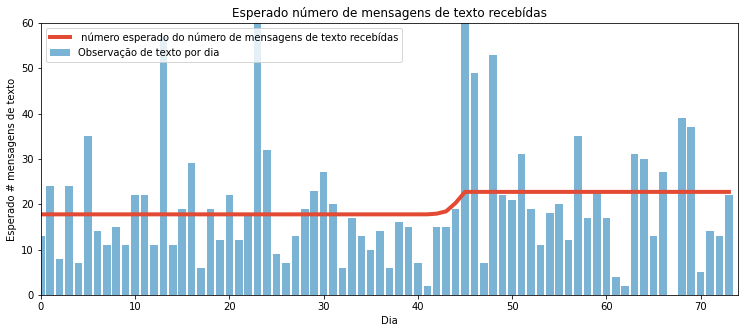

In [33]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contém
# N amostras a partir da distribuição à posteriori correspondente

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)

for day in range(0, n_count_data):
    # ix é um índice booleano de todas as amostras de tau correspondentes ao
    # switchpoint (ponto de mudança) ocorrendo antes do valor do 'dia'
    ix = day < tau_samples
    # Cada amostra à posteriori corresponde a um valor para tau.
    # para cada dia, esse valor de tau indica se estamos "antes"
    # (regido pelo lambda1) ou
    # "depois" (regido pelo lambda2), sob o ponto de switchpoint.
    # tomando a amostra à posteriori de lambda_{1/2} adequadamente, 
    # podemos calcular a média
    # em todas as amostras para obter um valor esperado para lambda naquele dia.
    # Conforme explicado, a variável aleatória "contagem de mensagens" 
    # é distribuída por Poisson,
    # e, portanto, lambda (o parâmetro da Poisson) é o valor esperado de
    # "contagem das mensagens".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label=" número esperado do número de mensagens de texto recebídas")
plt.xlim(0, n_count_data)
plt.xlabel("Dia")
plt.ylabel("Esperado # mensagens de texto")
plt.title("Esperado número de mensagens de texto recebídas")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="Observação de texto por dia")

plt.legend(loc="upper left");

Nossa análise mostra um forte suporte que nos leva a acreditar que o comportamento do usuário mudou ($\lambda_1$ teria valor próximo a $\lambda_2$ se isso não fosse verdade), e que a mudança foi repentina em vez de gradual (como demonstrado por $\tau$ na posteriori fortemente pontiaguda). Podemos especular o que pode ter causado isso: uma taxa de mensagem de texto mais barata, uma assinatura recente do clima para texto ou talvez um novo relacionamento. (Na verdade, o 45º dia corresponde ao Natal, e me mudei para Toronto no mês seguinte, deixando uma namorada para trás.)

##### Exercícios

1\.  Usando `lambda_1_samples` e `lambda_2_samples`, qual é a média das distribuições à posterioris de $\lambda_1$ e $\lambda_2$?

In [35]:
# Digite seu código aqui.

2\.  Qual é o aumento percentual esperado de aumento nas taxas de mensagens de texto? `dica:` calcule a média de `lambda_1_samples / lambda_2_samples`. Observe que esta quantidade é muito diferente de `lambda_1_samples.mean () / lambda_2_samples.mean ()`.

In [36]:
# Digite seu código aqui.

3\. Qual é a média de $\lambda_1$ **dado** que sabemos que $\tau$ é menor que 45. Ou seja, suponha que recebemos novas informações de que a mudança de comportamento ocorreu antes do dia 45. Qual é o valor esperado de $\lambda_1$ agora? (Você não precisa refazer a parte PyMC3. Considere todas as instâncias em que `tau_samples < 45`.)

In [37]:
# Digite seu código aqui.

### Referências


-  [1] Gelman, Andrew. N.p.. Web. 22 Jan 2013. [N is never large enough](http://andrewgelman.com/2005/07/31/n_is_never_larg).
-  [2] Norvig, Peter. 2009. [The Unreasonable Effectiveness of Data](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf).
- [3] Salvatier, J, Wiecki TV, and Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. *PeerJ Computer Science* 2:e55 <https://doi.org/10.7717/peerj-cs.55>
- [4] Jimmy Lin and Alek Kolcz. Large-Scale Machine Learning at Twitter. Proceedings of the 2012 ACM SIGMOD International Conference on Management of Data (SIGMOD 2012), pages 793-804, May 2012, Scottsdale, Arizona.
- [5] Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013. <https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1>.

In [38]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()